In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dir_path = "data/"
train_path = dir_path + "train.csv"
test_path =  dir_path + "test.csv"
sample_submission_path= dir_path + "sample_submission.csv" 

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
submit = pd.read_csv(sample_submission_path)

In [2]:
y = train["price"]
train_len = train.shape[0]
train = train.drop(columns="price")

In [3]:
data = pd.concat((train,test),axis=0)

In [4]:
data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,21498,20140626T000000,3,1.75,1500,11968,1.0,0,0,3,6,1500,0,2014,0,98010,47.3095,-122.002,1320,11303
6464,21499,20150126T000000,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
6465,21500,20150219T000000,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
6466,21501,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [5]:
def preprocess(df):
    df = df.drop(columns=["id"])
    df["date"] = df["date"].apply(lambda x : str(x[:6]))
    
    return df

In [6]:
df = preprocess(data)
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,201406,3,1.75,1500,11968,1.0,0,0,3,6,1500,0,2014,0,98010,47.3095,-122.002,1320,11303
6464,201501,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
6465,201502,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
6466,201406,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


# train simple model and submission

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

random_state = 200

train_x = df[:train_len]
train_y = y
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y,
                                test_size=0.2, random_state= random_state)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
mse = mean_squared_error(y_pred, y_val)
print("mse : {:.5f}".format(mse))

mse : 15748496090.60879


In [8]:
def get_rmse(y_pred, y_val):
    return np.sqrt(mean_squared_error(y_pred, y_val))
print("mse : {:.5f}".format(get_rmse(y_pred,y_val)))

mse : 125493.01212


In [9]:
test_x = df[train_len:]
y_pred = rf.predict(test_x)
print(y_pred)

[ 490338.    483190.25 1309535.   ...  429255.09  331642.82  430150.43]


In [10]:
submission_path = "./submission.csv"
submit["price"] = y_pred
submit.to_csv(submission_path,index=False)

In [11]:
def submit_pred(y_pred, name=""):
    submission_path = "./submission"+name+".csv"
    submit["price"] = y_pred
    submit.to_csv(submission_path,index=False)

def get_train_val_dataset(df, y):
    train_x = df[:train_len]
    train_y = y
    X_train, X_val, y_train, y_val = train_test_split(train_x, train_y,
                                    test_size=0.2, random_state= random_state)
    return X_train, X_val, y_train, y_val

def get_model_rmse(model, df, y):
    X_train, X_val, y_train, y_val = get_train_val_dataset(df, y)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print("rmse : {:.5f}".format(get_rmse(y_pred,y_val)))
    return model

# convert date to categorial variable

In [12]:
from sklearn.preprocessing import LabelEncoder

def date_to_categorial(df):
    encoder = LabelEncoder()
    df["date"] = encoder.fit_transform(df["date"])
    return df

df = preprocess(data)
df_date = date_to_categorial(df)

rf = RandomForestRegressor(random_state=random_state)
rf = get_model_rmse(rf, df_date, y)

rmse : 124835.83068


In [13]:
y_pred = rf.predict(test_x)
submit_pred(y_pred)
print(y_pred)

[ 497061.    501608.   1386547.   ...  440917.57  342799.02  450758.51]


# log tf and get rmse
- rmse not improved in random forest

In [14]:
def visualize_kde(df):
    fig, ax = plt.subplots(9, 2, figsize=(12, 50))

    count = 1
    columns = df.columns
    #print(columns)
    for row in range(9):
        for col in range(2):
            sns.kdeplot(df[columns[count]], ax=ax[row][col])
            ax[row][col].set_title(columns[count], fontsize=15)
            count+=1
            if count == 19: break

def log_transform(df):
    df_log = df.copy()
    skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

    for col in skew_columns:
        df_log[col] = np.log1p(df_log[col].values)
    return df_log

In [15]:
df_date

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,9,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,9,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,1,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,8,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,1,3,1.75,1500,11968,1.0,0,0,3,6,1500,0,2014,0,98010,47.3095,-122.002,1320,11303
6464,8,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
6465,9,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
6466,1,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


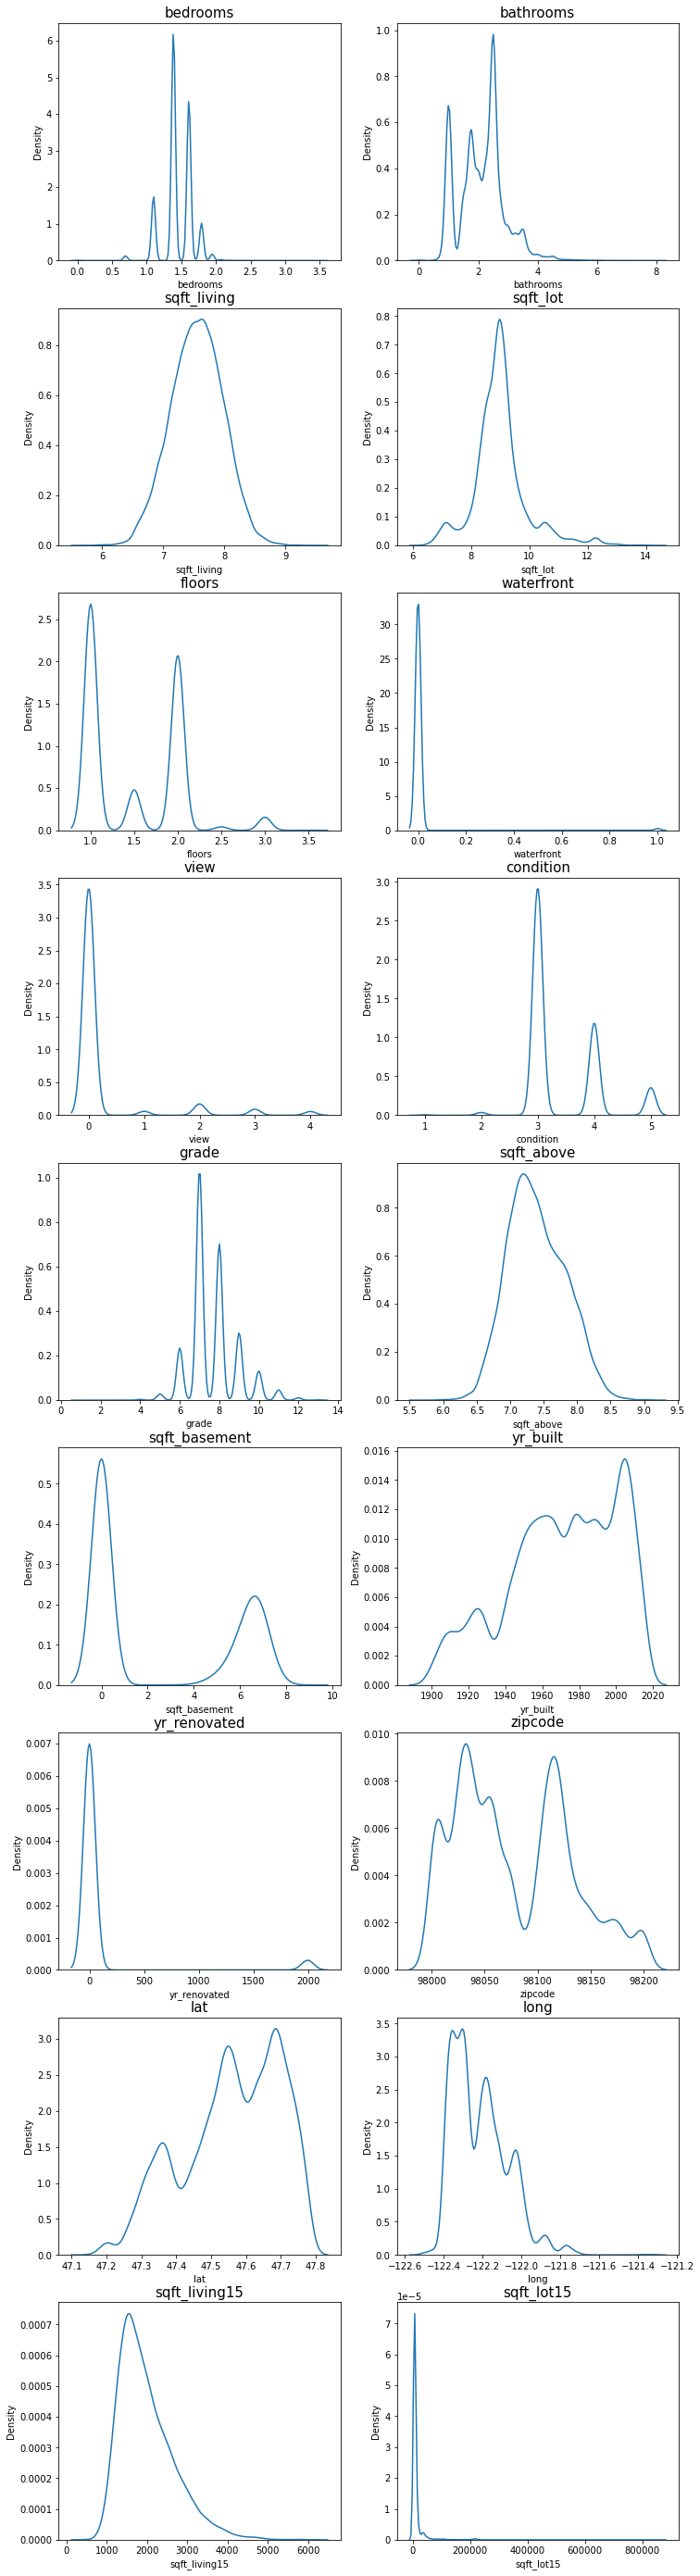

In [16]:
df = preprocess(data)
df_date = date_to_categorial(df)
test_x = df[train_len:]
df_log = log_transform(df_date)
visualize_kde(df_log)

In [17]:
rf = RandomForestRegressor(random_state=random_state)
rf = get_model_rmse(rf, df_log, y)
y_pred = rf.predict(test_x)
submit_pred(y_pred)
print(y_pred)

rmse : 125010.47487
[ 914232.   895957.5 3060660.  ... 1191972.5 1080352.   937666.3]


In [18]:
rf = RandomForestRegressor(random_state=random_state)
rf = get_model_rmse(rf, df_date, y)
y_pred = rf.predict(test_x)
print(y_pred)

rmse : 124835.83068
[ 494150.5   472133.   1309719.5  ...  432490.34  335073.46  438297.71]


# default model's rmse

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=random_state)
gb = get_model_rmse(gb, df_date, y)

rmse : 134842.53541


In [20]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=random_state)
xgb = get_model_rmse(xgb, df_date, y)

rmse : 129027.58037


In [21]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(random_state = random_state)
lgbm = get_model_rmse(lgbm, df_date, y)

rmse : 132645.58406


# grid seach

In [22]:
from sklearn.model_selection import GridSearchCV

def grid_search(model, param_grid, random_state, df, y, cv):
    train_x = df[:train_len]
    train_y = y
    grid_model = GridSearchCV(model,
                             param_grid=param_grid,
                            verbose=1,
                            n_jobs=5,
                             cv=cv)
    grid_model.fit(train_x, train_y)
    return grid_model


def result_df(grid_model):
    cv_res = grid_model.cv_results_
    cols = ["param_max_depth", "param_n_estimators","param_min_samples_split","param_min_samples_leaf","mean_test_score"]
    results_df = pd.DataFrame(cv_res, columns=cv_res.keys())
    results = results_df[cols]

    rename_dict = {
        "param_max_depth" : "max_depth",
        "param_n_estimators" : "n_estimators",
        "param_min_samples_leaf":"min_samples_leaf",
        "param_min_samples_split":"min_samples_split",
        "mean_test_score":"score"
    }
    results = results.rename(columns = rename_dict)
    #results["RMSLE"] = np.sqrt(-1*results["score"])
    results = results.sort_values("score", ascending=True)
    return results

In [23]:
param_grid = {
    "n_estimators" :[100, 200],
    "max_depth": [4, 10, 20, None],
    "min_samples_split":[8, 16, 32, 48, 64, 128, 256],
    "min_samples_leaf":[1, 2]
}
rf = RandomForestRegressor(random_state=random_state)
rf_grid_model = grid_search(rf, param_grid,random_state, df_date, y,2)

Fitting 2 folds for each of 112 candidates, totalling 224 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   18.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.9min
[Parallel(n_jobs=5)]: Done 224 out of 224 | elapsed:  3.5min finished


In [24]:
res = result_df(rf_grid_model)
res

,max_depth,n_estimators,min_samples_split,min_samples_leaf,score
26,4,100,256,2,0.646808
12,4,100,256,1,0.646809
13,4,200,256,1,0.648731
27,4,200,256,2,0.648735
10,4,100,128,1,0.671493
...,...,...,...,...,...
71,20,200,8,2,0.826149
56,20,100,8,1,0.827016
84,None,100,8,1,0.827125
85,None,200,8,1,0.828110


In [25]:
rf_best = rf_grid_model.best_estimator_
rf_best = get_model_rmse(rf_best, df_date, y)

rmse : 125389.77183


In [26]:
y_pred = rf_best.predict(test_x)
submit_pred(y_pred, name="_rf_best")

In [27]:
param_grid = {
    "n_estimators" :[100, 200],
    "max_depth": [4, 10, 20, None],
    "min_samples_split":[8, 16, 32, 48, 64, 128, 256],
    "min_samples_leaf":[1, 2, 4]
}

gb = GradientBoostingRegressor(random_state=random_state)
gb_grid_model = grid_search(gb, param_grid,random_state, df_date, y,2)
gb_res = result_df(gb_grid_model)
gb_res

Fitting 2 folds for each of 168 candidates, totalling 336 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   26.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  4.3min
[Parallel(n_jobs=5)]: Done 336 out of 336 | elapsed: 17.6min finished


,max_depth,n_estimators,min_samples_split,min_samples_leaf,score
139,None,200,256,1,0.806085
138,None,100,256,1,0.806232
84,20,100,8,1,0.808990
85,20,200,8,1,0.808994
166,None,100,256,4,0.809426
...,...,...,...,...,...
17,4,200,16,2,0.851590
3,4,200,16,1,0.851811
1,4,200,8,1,0.851992
31,4,200,16,4,0.852474


In [28]:
gb_best = gb_grid_model.best_estimator_
"""
gb_best = GradientBoostingRegressor(max_depth=20,
                                    min_samples_split=8,
                                    random_state=random_state)
"""
gb_best = get_model_rmse(gb_best, df_date, y)
gb_best

rmse : 114738.58790


GradientBoostingRegressor(max_depth=4, min_samples_leaf=2, min_samples_split=8,
                          n_estimators=200, random_state=200)

In [29]:
y_pred = gb_best.predict(test_x)
submit_pred(y_pred, name="_gb_best")

In [30]:
param_grid = {
    "n_estimators" :[100, 200],
    "max_depth": [5, 16, 32, None],
    "min_data_in_leaf":[1, 2, 8, 16, 32],
    "num_leaves":[15, 31, 40, 50, 64, 90]
}

lgbm = LGBMRegressor(random_state = random_state)
lgbm_grid_model = grid_search(lgbm, param_grid,random_state, df_date, y,2)

Fitting 2 folds for each of 240 candidates, totalling 480 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   11.3s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:   34.5s
[Parallel(n_jobs=5)]: Done 480 out of 480 | elapsed:   38.8s finished


[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8


In [31]:
cv_res = lgbm_grid_model.cv_results_
cols = ["param_max_depth", "param_n_estimators","param_min_data_in_leaf","param_num_leaves","mean_test_score"]
results_df = pd.DataFrame(cv_res, columns=cv_res.keys())
results = results_df[cols]

rename_dict = {
    "param_max_depth" : "max_depth",
    "param_n_estimators" : "n_estimators",
    "param_min_data_in_leaf":"min_data_in_leaf",
    "param_num_leaves":"num_leaves",
    "mean_test_score":"score"
}
results = results.rename(columns = rename_dict)
#results["RMSLE"] = np.sqrt(-1*results["score"])
lgbm_res = results.sort_values("score", ascending=True)
lgbm_res

,max_depth,n_estimators,min_data_in_leaf,num_leaves,score
125,32,100,1,90,0.836653
185,None,100,1,90,0.836653
131,32,200,1,90,0.837253
191,None,200,1,90,0.837253
65,16,100,1,90,0.837274
...,...,...,...,...,...
66,16,200,1,15,0.860552
186,None,200,1,15,0.860552
210,None,200,8,15,0.861317
150,32,200,8,15,0.861317


In [32]:
lgbm_best = lgbm_grid_model.best_estimator_
lgbm_best = get_model_rmse(lgbm_best, df_date, y)

rmse : 120709.69415


In [33]:
y_pred = lgbm_best.predict(test_x)
submit_pred(y_pred, name="_lgbm_best")

# average model

In [34]:
train_x = df[:train_len]
train_y = y
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y,
                                test_size=0.2, random_state= random_state)

models = [rf_best, gb_best, lgbm_best]

def average_model_rmse(models, X_val, y_val):
    predictions = np.column_stack([
        model.predict(X_val) for model in models
    ])
    y_pred = np.mean(predictions, axis=1)

    rmse = np.sqrt(mean_squared_error(y_pred, y_val))
    print("rmse : {:.3f}".format(rmse))
    return predictions, y_pred, rmse

predictions, y_pred, rmse = average_model_rmse(models, X_val, y_val)

rmse : 115950.628


In [35]:
predictions

array([[580531.70772485, 535592.09911302, 575040.02764547],
       [616022.72343101, 652894.32660557, 626939.45775428],
       [399027.40170152, 393867.01632838, 391521.9157646 ],
       ...,
       [412613.5179487 , 439034.7603888 , 428546.59987578],
       [322881.85412528, 340714.38425819, 350491.01916585],
       [493610.26839164, 561612.38386337, 560306.29640813]])

In [36]:
y_pred

array([563721.27816112, 631952.16926362, 394805.44459817, ...,
       426731.62607109, 338029.08584977, 538509.64955438])

In [37]:
def average_model_predict(models, X_test):
    predictions = np.column_stack([
        model.predict(X_test) for model in models
    ])
    y_pred = np.mean(predictions, axis=1)
    #print(y_pred)
    return y_pred

In [38]:
def predict_test(models, name="_default_model"):
    for model in models:
        y_pred = model.predict(X_train)
        print("###"+model.__class__.__name__+name+"###")
        print("train predict : ",y_pred[:4])
        print("train label : ",y_train.values[:4])
        print("")
        y_pred = model.predict(X_val)
        print("val predict : ",y_pred[:4])
        print("val label : ",y_val.values[:4])
        y_pred = model.predict(test_x)
        print("test pred : ",y_pred[:4])
        get_model_rmse(model, df_date, y)
        print("-------------------------\n")

In [41]:
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
default_models = [rf, gb, xgb, lgbm]

for model in default_models:
    model.fit(X_train, y_train)

predict_test(default_models)

###RandomForestRegressor_default_model###
train predict :  [247630.51 211628.87 498846.4  906225.6 ]
train label :  [218000. 219950. 500000. 925000.]

val predict :  [580960.64 619402.   400200.94 312704.3 ]
val label :  [425000. 630000. 379950. 254000.]
test pred :  [ 483110.    479972.87 1246152.5   306385.9 ]
rmse : 122653.40026
-------------------------

###GradientBoostingRegressor_default_model###
train predict :  [ 337961.96860865  210928.86430593  501935.90374428 1003607.43538668]
train label :  [218000. 219950. 500000. 925000.]

val predict :  [515513.3085494  637747.50269779 399702.08605139 302981.71823458]
val label :  [425000. 630000. 379950. 254000.]
test pred :  [ 571834.60303352  366241.97899837 1384105.34574115  341861.78252431]
rmse : 133101.16669
-------------------------

###XGBRegressor_default_model###
train predict :  [280319.2  198738.89 470457.2  850061.56]
train label :  [218000. 219950. 500000. 925000.]

val predict :  [679880.   582562.4  386989.88 309442.78]

In [42]:
def avg_model_predict_test(models, name="_default_model"):
    y_pred = average_model_predict(models, X_train)
    print("### Average Model ###")
    print("train predict : ",y_pred[:4])
    print("train label : ",y_train.values[:4])
    print("")
    y_pred = average_model_predict(models, X_val)
    print("val predict : ",y_pred[:4])
    print("val label : ",y_val.values[:4])
    y_pred = average_model_predict(models, test_x)
    print("test pred : ",y_pred[:4])
    mse = mean_squared_error(average_model_predict(models, X_val), y_val)
    print("rmse : {:.6f}".format(np.sqrt(mse)))
    print("-------------------------\n")

In [43]:
avg_model_predict_test(default_models)

### Average Model ###
train predict :  [283705.17605904 210277.8639506  473257.37433185 894013.23532641]
train label :  [218000. 219950. 500000. 925000.]

val predict :  [585019.55923534 618553.41610304 391392.51043488 309134.58544657]
val label :  [425000. 630000. 379950. 254000.]
test pred :  [ 507759.98441215  440666.74412621 1386203.0710629   322367.84604171]
rmse : 120159.241899
-------------------------



In [44]:
predictions, y_pred, rmse = average_model_rmse(models, X_val, y_val)
rmse

rmse : 115950.628


115950.62818020505

In [45]:
y_pred = average_model_predict(models, test_x)
submit_pred(y_pred, name="_default_average_model")

In [46]:
best_models = [rf_best, gb_best, lgbm_best]
predict_test(best_models, name="_best_model")
avg_model_predict_test(best_models)

###RandomForestRegressor_best_model###
train predict :  [245325.80931433 205365.37704336 496515.4521774  961449.14374342]
train label :  [218000. 219950. 500000. 925000.]

val predict :  [580531.70772485 616022.72343101 399027.40170152 311441.31105639]
val label :  [425000. 630000. 379950. 254000.]
test pred :  [ 489623.66267013  469517.46269653 1307069.85722854  301135.73618481]
rmse : 125389.77183
-------------------------

###GradientBoostingRegressor_best_model###
train predict :  [309314.53619821 216185.56938839 449512.47909868 898287.58660901]
train label :  [218000. 219950. 500000. 925000.]

val predict :  [535592.09911302 652894.32660557 393867.01632838 307313.49153705]
val label :  [425000. 630000. 379950. 254000.]
test pred :  [ 521862.05681134  412218.36377374 1424101.75839662  331097.26665979]
rmse : 114738.58790
-------------------------

###LGBMRegressor_best_model###
train predict :  [311331.29243181 222321.13530011 457214.94491947 885515.40108219]
train label :  [218000

In [61]:
y_pred = average_model_predict(best_models, test_x)
submit_pred(y_pred, name="_best_average_model")

# Xgb hyperparameter tuning

In [67]:
xgb = XGBRegressor(random_state = random_state)

param_grid = {
    "max_depth": [16, 32, 64, None],
    "learning_rate":[0.05, 0.1, 0.2, 0.3]
}
xgb_grid_model = grid_search(xgb, param_grid,random_state, df_date, y,2)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=5)]: Done  32 out of  32 | elapsed:  3.3min finished


In [69]:
cv_res = xgb_grid_model.cv_results_
cols = ["param_max_depth","param_learning_rate","mean_test_score"]
results_df = pd.DataFrame(cv_res, columns=cv_res.keys())
results = results_df[cols]

rename_dict = {
    "param_max_depth" : "max_depth",
    "param_learning_rate":"learning_rate",
    "mean_test_score":"score"
}
results = results.rename(columns = rename_dict)
#results["RMSLE"] = np.sqrt(-1*results["score"])
xgb_res = results.sort_values("score", ascending=True)
xgb_res

,max_depth,learning_rate,score
13,32,0.3,0.813280
14,64,0.3,0.814463
12,16,0.3,0.817318
10,64,0.2,0.821694
9,32,0.2,0.821890
8,16,0.2,0.822713
5,32,0.1,0.831103
6,64,0.1,0.831530
0,16,0.05,0.833822
1,32,0.05,0.834534


In [70]:
xgb_best = xgb_grid_model.best_estimator_
xgb_best = get_model_rmse(xgb_best, df_date, y)

rmse : 119248.39452


# add xgb_best to average_model

In [71]:
best_models = [rf_best, gb_best, xgb_best, lgbm_best]
predict_test(best_models, name="_best_model")
avg_model_predict_test(best_models)

###RandomForestRegressor_best_model###
train predict :  [245325.80931433 205365.37704336 496515.4521774  961449.14374342]
train label :  [218000. 219950. 500000. 925000.]

val predict :  [580531.70772485 616022.72343101 399027.40170152 311441.31105639]
val label :  [425000. 630000. 379950. 254000.]
test pred :  [ 489623.66267013  469517.46269653 1307069.85722854  301135.73618481]
rmse : 125389.77183
-------------------------

###GradientBoostingRegressor_best_model###
train predict :  [309314.53619821 216185.56938839 449512.47909868 898287.58660901]
train label :  [218000. 219950. 500000. 925000.]

val predict :  [535592.09911302 652894.32660557 393867.01632838 307313.49153705]
val label :  [425000. 630000. 379950. 254000.]
test pred :  [ 521862.05681134  412218.36377374 1424101.75839662  331097.26665979]
rmse : 114738.58790
-------------------------

###XGBRegressor_best_model###
train predict :  [298193.1 205785.4 433940.5 837091.6]
train label :  [218000. 219950. 500000. 925000.]

v

In [72]:
y_pred = average_model_predict(best_models, test_x)
submit_pred(y_pred, name="_best_average_model")

In [73]:
y_pred

array([ 510200.86353485,  445082.69519646, 1393710.49022688, ...,
        446106.29030354,  331912.61248753,  432844.96956185])

![제출 결과물](my_scores.png)


https://www.kaggle.com/jeongchando/home-sweet-home